In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime, timedelta

In [3]:
# Load validation data
val_data = pd.read_csv("../data/processed/splits/val_data.csv")
X_val = val_data.drop(columns=["puffs"]) 
y_val = val_data["puffs"]                

# Load model
model_path = f"../model/production/xgb_hyp20250302-1821_mae_0.5.pkl"
model = joblib.load(model_path)

### Generate New Data for predictions

In [4]:
# Predict on validation data
val_preds = model.predict(X_val)

# Convert predictions to integers (as per your requirement)
val_preds = np.round(val_preds).clip(min=0).astype(int)

# Add to DataFrame
val_data["predicted_puffs"] = val_preds

# Calculate errors
val_data["error"] = val_data["puffs"] - val_data["predicted_puffs"]
val_data["absolute_error"] = np.abs(val_data["error"])

# Key Metrics
print(f"Mean Absolute Error: {val_data['absolute_error'].mean():.2f}")
print(f"Accuracy within ±1 puff: {(val_data['absolute_error'] <= 1).mean():.1%}")

Mean Absolute Error: 0.45
Accuracy within ±1 puff: 92.9%


<Axes: xlabel='predicted_puffs'>

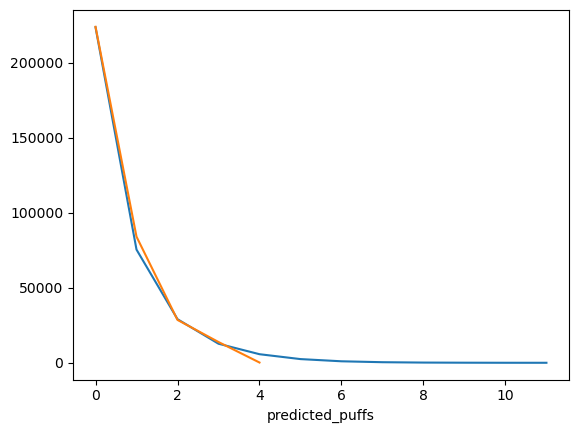

In [5]:
# val_data['absolute_error'].value_counts().plot()
val_data['puffs'].value_counts().plot()
val_data['predicted_puffs'].value_counts().plot()

In [6]:
# Save with key features for mapping
val_data[["hour", "district", "latitude", 
          "longitude", "puffs", "predicted_puffs", 
          "pm25_24h_avg"]].to_csv("../data/processed/forecasts/val_data_preds.csv", 
    index=False
)

KeyError: "['district', 'latitude', 'longitude'] not in index"